# Align measured with annotated spectra

In [1]:

%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("..")

import pandas as pd
import matchms
from matchms.importing import load_from_msp
from data_utils import spectrum_processing
from pipeline_utils import get_galaxy_filename

def get_spectra(path):
    spectrums = [spectrum_processing(s, min_rel_int=None, n_required_peaks=1) for s in load_from_msp(path, metadata_harmonization=False)]
    # Omit spectrums that didn't qualify for analysis
    spectrums = [s for s in spectrums if s is not None]
    return spectrums

In [65]:
model = "Orig_exp_6"

ground = pd.read_csv("tmp/6_KC_Confirmed_seminalplasma.csv.csv")
library = get_spectra("tmp/5_rcx_gc-orbitrap_metabolites_20210817.msp.msp")
measured = get_spectra(get_galaxy_filename(f"_{model}", "tmp"))
matches = pd.read_csv(get_galaxy_filename(f"- {model}", "tmp"), sep="\t")

In [66]:
ground["RT"] = ground["Average Rt(min)"]*60
ground = ground.sort_values(by=['RT'], ascending=True) 

In [67]:
# super inefficent variant :))
def get_RTI(c_ids, measured):
    rts =[]
    ris = []
    for c_id in c_ids:
        for spectrum in measured:
            if c_id == spectrum.metadata["compound_name"]:
                rts.append(spectrum.metadata["retention_time"])
                ris.append(spectrum.metadata["retention_index"])
                break
    return rts, ris
matches["RT"], matches["RI"] = get_RTI(matches["query"], measured)

matches = matches.sort_values(by=['RT'], ascending=True) 

In [68]:
measured[0].metadata

{'ionmode': 'Negative',
 'spectrumtype': 'Centroid',
 'num_peaks': '25',
 'compound_name': 'C049',
 'retention_time': '121.5',
 'retention_index': '1076.086957'}

In [69]:
len(measured)

400

In [70]:
# select library spectra present in ground
ground

# add RT column to the selected library spectra


# sort selected library spectra by RT

,Average Rt(min),Average RI,Metabolite name,RT
0,2.484,1224.68,2-Methylmalonic acid_2TMS,149.04
33,2.615,1266.17,Leucine_2TMS,156.90
31,2.691,1288.34,Isoleucine_2TMS,161.46
47,2.718,1296.42,Proline_2TMS,163.08
26,2.744,1303.46,Glycine_3TMS,164.64
...,...,...,...,...
57,5.793,2234.36,Stearic acid_1TMS,347.58
55,5.832,2247.44,Spermidine_5TMS,349.92
56,7.086,2740.02,Spermine_6TMS,425.16
37,8.709,3529.40,Maltotriose_11TMS isomer 1,522.54


In [71]:
matches

,query,reference,matches,score,RT,RI
481,C184,Alanine_2TMS,1,0.068420,127.02,1114.242424
570,C234,Alanine_2TMS,3,0.010772,127.02,1114.242424
531,C207,Alanine_2TMS,1,0.009456,128.18,1120.10101
447,C162,Alanine_2TMS,1,0.011436,128.41,1121.262626
283,C085,Alanine_2TMS,1,0.008364,128.96,1124.040404
...,...,...,...,...,...,...
265,C076,Cholestanol_1TMS,2,0.008015,474.42,3203.5
284,C087,7-Dehydrocholesterol_1TMS,9,0.340872,475.65,3213.75
285,C087,Cholestanol_1TMS,5,0.190132,475.65,3213.75
661,C308,Cholestatrienol_1TMS,1,0.005140,481.02,3258.5


In [72]:
# from dtw import *
# alignment = dtw(query, template, keep_internals=True)

In [73]:
matches["grank"] = matches.groupby("query")["score"].rank("dense", ascending=False)

In [74]:
matches[matches["query"] =="C10"]

,query,reference,matches,score,RT,RI,grank


In [75]:
list(matches.reference)[0]

'Alanine_2TMS'

180

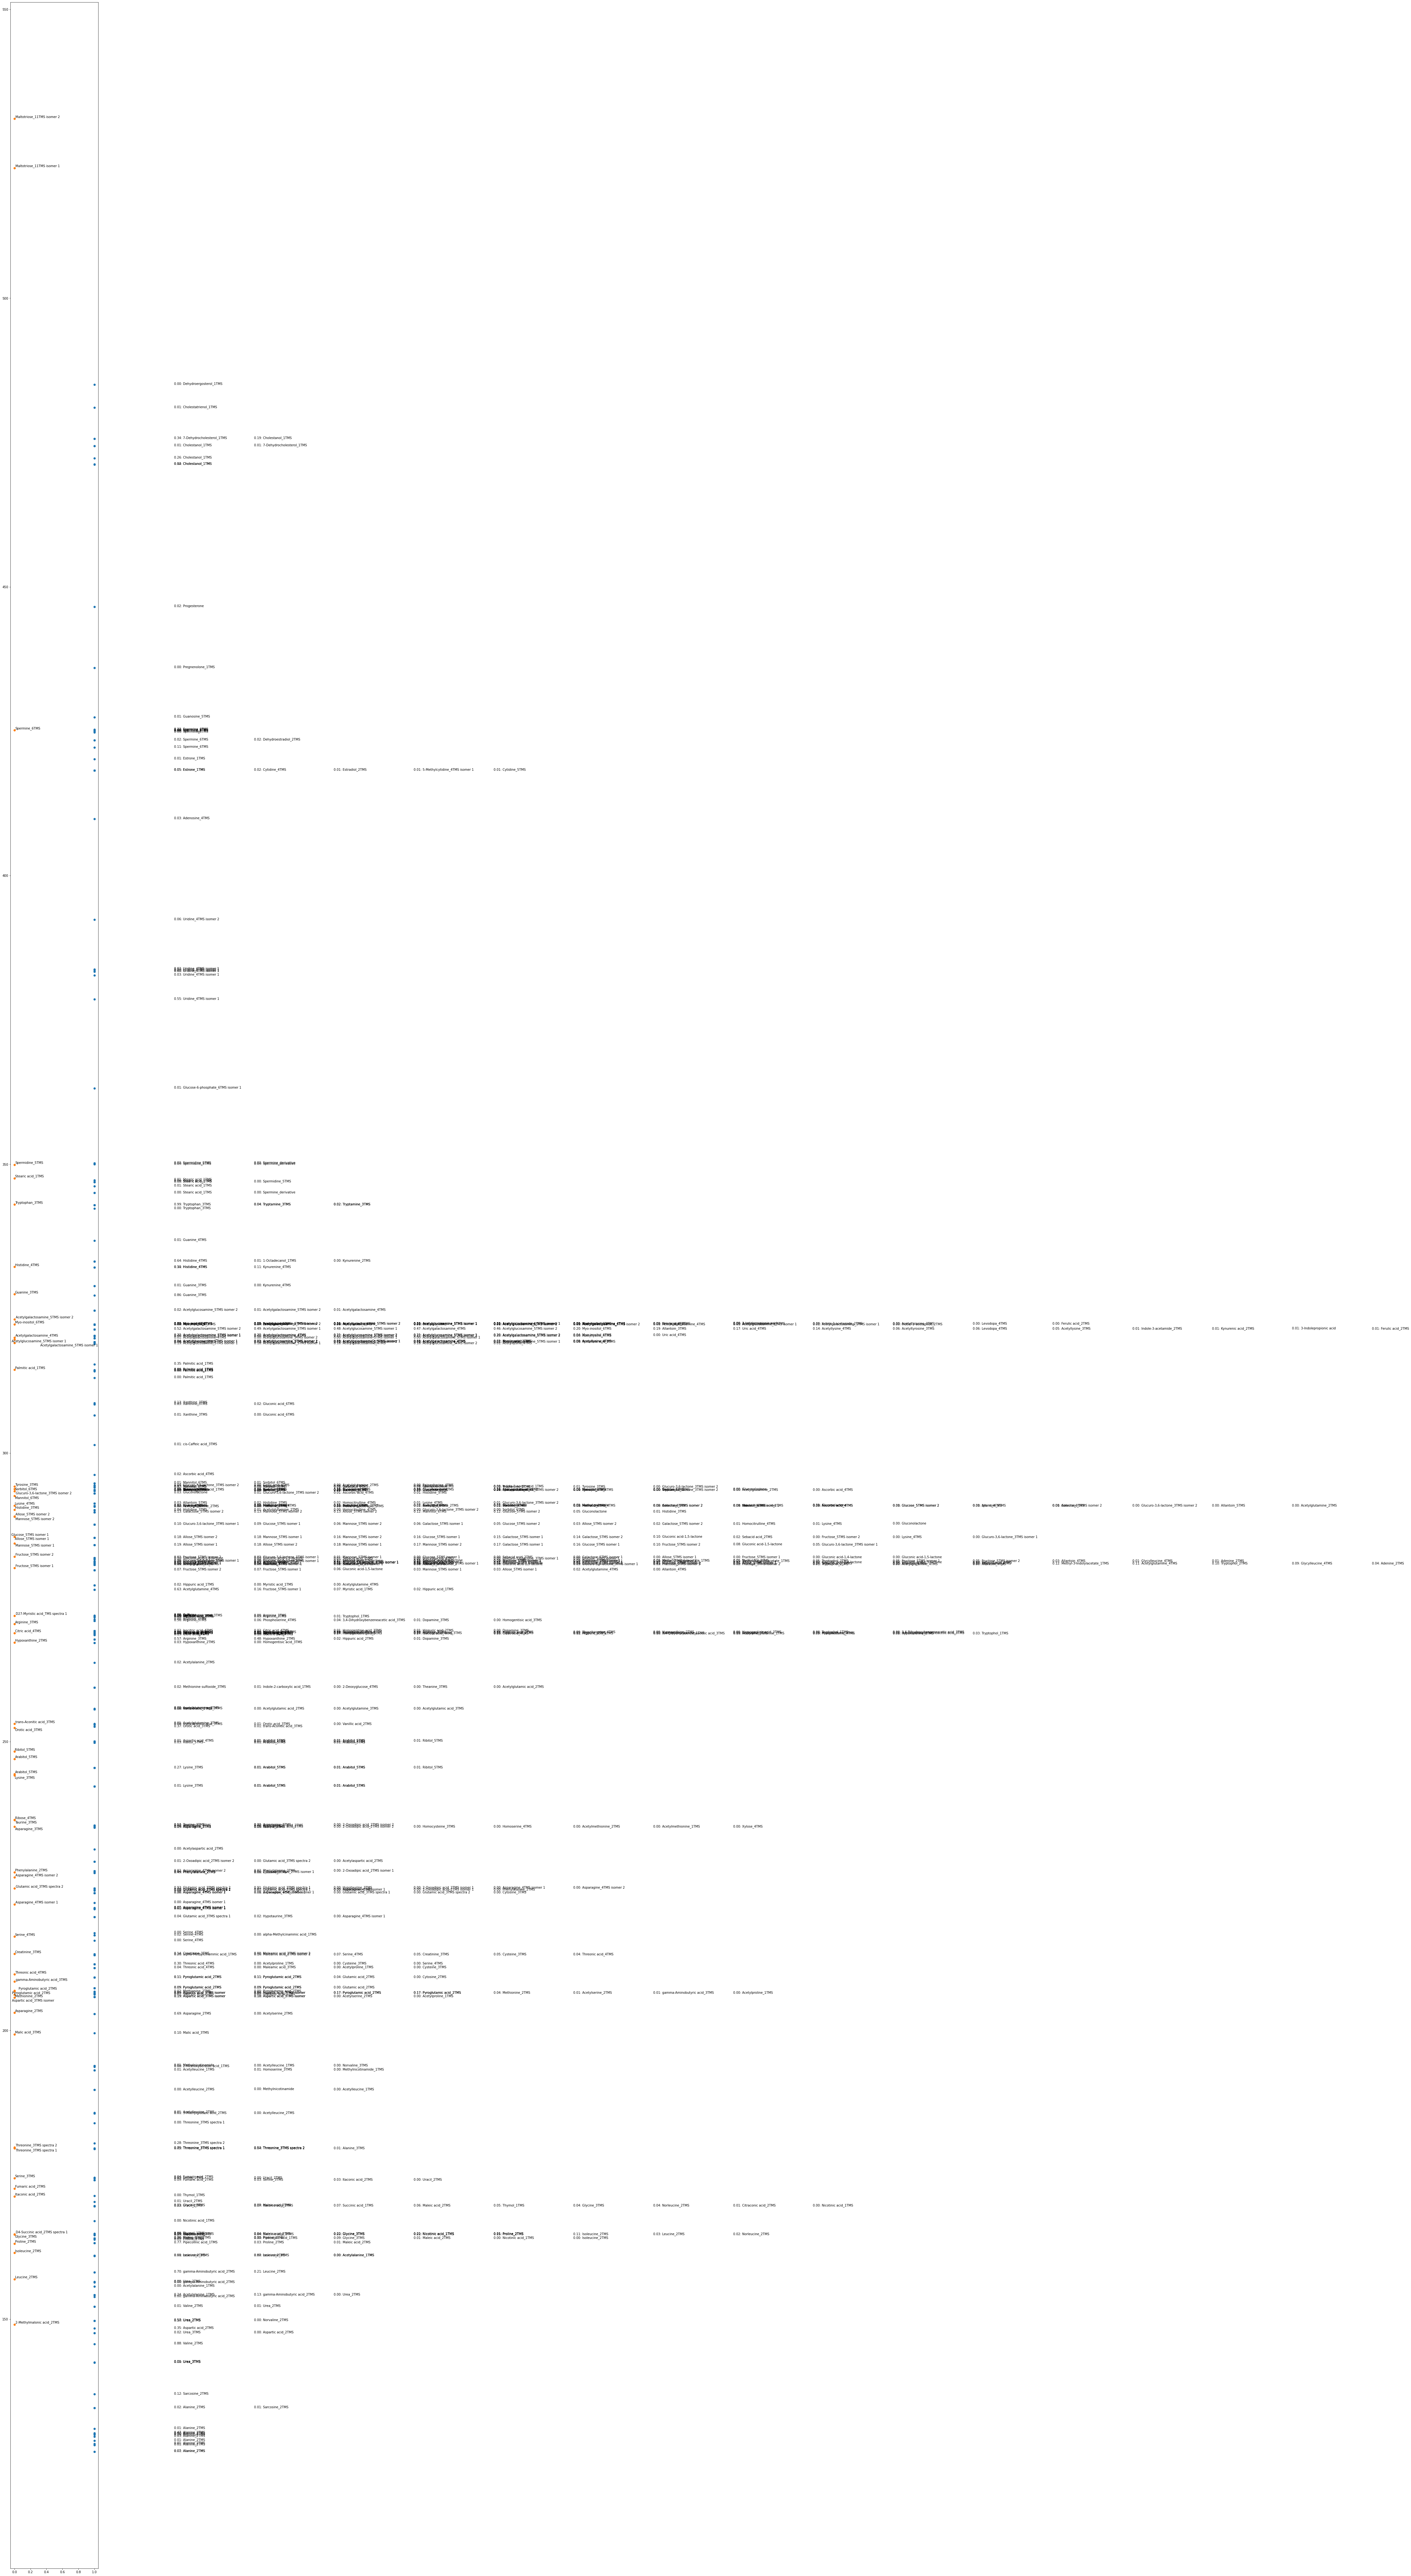

In [76]:
from adjustText import adjust_text
import matplotlib.pyplot as plt
import numpy as np
y1 = list(matches.RT.astype(float))
y2 = list(ground.RT)
x1,x2 = np.repeat(1, len(matches)), np.repeat(0, len(ground))
n1,ranks, scores = list(matches.reference), list(matches.grank), list(matches.score)
n2 = list(ground["Metabolite name"])

fig, ax = plt.subplots(figsize=(5, 150))
ax.scatter(x1, y1)
ax.scatter(x2, y2)

texts = []
adjust_text(texts)

for i, (txt, rank, score) in enumerate(zip(n1,ranks, scores)):
#     texts.append(plt.text(x1[i]+rank, y1[i], txt, ha='center', va='center'))
    ax.annotate(f"{score:.2f}: {txt}", (x1[i] + rank, y1[i]), annotation_clip=False)
for i, txt in enumerate(n2):
    texts.append(plt.text(x2[i], y2[i], txt, ha='center', va='center'))
#     ax.annotate(txt, (x2[i], y2[i]))
adjust_text(texts)


In [77]:
y1.to_list()

AttributeError: 'list' object has no attribute 'to_list'

In [ ]:
y2.to_list()

In [ ]:
ground

In [ ]:
measured[0].metadata

In [ ]:
annotated = []
for i, row in ground.iterrows():
    c = row["Metabolite name"]
    for s in library:
        if s.metadata["compound_name"] == c:
            annotated.append((s, row["RT"]))
            break
    


In [ ]:
measured[0].metadata

In [ ]:
annotated[0][0].metadata

## add manually unmatched compounds

In [ ]:
unmatched = {'2-Methylmalonic acid_2TMS',
 'Allose_5TMS isomer 2',
 'Arabitol_5TMS',
 'Asparagine_2TMS',
 'Asparagine_4TMS isomer 2',
 'D27-Myristic acid_TMS spectra 1',
 'D4-Succinic acid_2TMS spectra 1',
 'Fumaric acid_2TMS',
 'Glucose_5TMS isomer 1',
 'Glucuro-3,6-lactone_3TMS isomer 2',
 'Guanine_3TMS',
 'Histidine_4TMS',
 'Hypoxanthine_2TMS',
 'Isoleucine_2TMS',
 'Itaconic acid_2TMS',
 'Leucine_2TMS',
 'Lysine_3TMS',
 'Malic acid_3TMS',
 'Maltotriose_11TMS isomer 1',
 'Maltotriose_11TMS isomer 2',
 'Mannitol_6TMS',
 'Mannose_5TMS isomer 2',
 'Methionine_2TMS',
 'Orotic acid_3TMS',
 'Pyroglutamic acid_2TMS',
 'Ribitol_5TMS',
 'Ribose_4TMS',
 'Serine_4TMS',
 'Spermidine_5TMS',
 'Spermine_6TMS',
 'Taurine_3TMS',
 'Threonic acid_4TMS',
 'Tryptophan_3TMS',
 'gamma-Aminobutyric acid_3TMS',
 'trans-Aconitic acid_3TMS'}

In [ ]:
def get_close(RT, meas, window=3):
    res = []
    for spectrum in meas:
        if abs(float(spectrum.metadata["retention_time"]) - RT) < window:
            res.append(spectrum)
    return res

In [ ]:
get_close(120,measured)

In [ ]:
for spec, RT in annotated:
    if spec.metadata["compound_name"] in unmatched:
        meas = get_close(RT,measured)
        
        for m_s in meas:
            matchms.plotting.plot_spectra_mirror(m_s, spec)
            plt.show()

In [ ]:
l =17
r = 0

print(measured[l].metadata["retention_time"], annotated[r][1])

fig,ax = plt.subplots(1, 1, figsize=(10, 8))
# matchms.plotting.plot_spectrum(measured[l], ax=ax[0])
# matchms.plotting.plot_spectrum(annotated[r][0], ax=ax[1])
matchms.plotting.plot_spectra_mirror(measured[l],annotated[r][0])

In [ ]:
results_meas = [[ "out", "part"], # prolly together with 1
                [ "out", "part"], # prolly together with 0
                ["out"],
                ["out", "part"],
                ["FP", "part"], # should be together with previous one
                ["out", "FP"], # maybe also together with previous one
                ["out"],
                ["out"],
                ["out"],
                
# 12-15 are one compound on 

In [ ]:
g = set(ground["Metabolite name"]) 
l = set([x.metadata["compound_name"] for x in library])

In [ ]:
g -l 

In [ ]:
g